In [38]:
# plotting libraries

# for inline plots in jupyter
if True:
    %matplotlib inline
else:
    %matplotlib notebook
    
    
# import matplotlib
import matplotlib.pyplot as plt
#import numpy
import numpy as np
#import scipy.stats
import scipy.stats
# import integrate
import scipy.integrate as integrate
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

import seaborn as sns


# Distribución Beta - Bernuilli

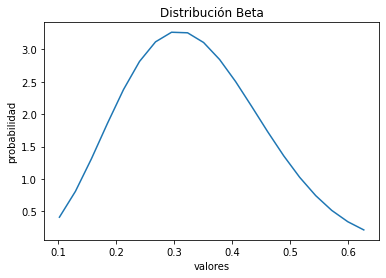

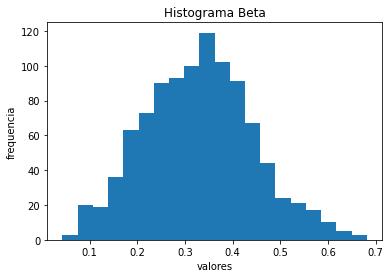

In [77]:
# Parametros de Distribución Beta
a = 5; b = 10 
# Parametros para verosimilitud
n = 20; k = 1

# Graficando Beta
beta = scipy.stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 20)

# Función de Probabilidad pi(sigma) = B(o|a,b)
fp = beta.pdf(x) 
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# histograma
aleatorios = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

### 1.- ¿Cuál es el valor de  E[θ]  antes de realizar el experimento?

Sabiendo que $\mu_{prior}$ = $E[\sigma]_{prior}$ = $\int^\infty_{-\infty}\sigma B(\sigma|\alpha,\beta) \partial\sigma$ = $ \frac{\alpha}{\alpha + \beta} $.

Y sabiendo que esto es igual a: $\alpha = 5 $ Y que beta $\beta = 10$

El resultado de la pregunta 1, la probabilidad esperada para el prior es: $$\mu_{prior} = \frac{5}{5 + 10} = \frac{5}{15} = \frac{1}{3} = 0.333333333$$

In [59]:
def prob(a,b):
    return a/(a+b)
    
mu_p = prob(a,b)

print("mu_priori = ", mu_p)

mu_priori =  0.3333333333333333


### ¿Cuál es el valor de  E[θ]  después de observar el resultado del experimento?
Función de verosimilitud **no normalizada** $$\pi(x|\sigma) \equiv \sigma^k(1 - \sigma)^{n-k}$$

$E[\sigma]$ despues de observar el experimento = 
$$ = \frac{\int^{\infty}_{-\infty}\sigma\pi(x|\sigma)\pi(\sigma)\partial\sigma}{\int^{\infty}_{-\infty}\pi(x|\sigma)\pi(\sigma) \partial\sigma}= $$ 

$$ = \frac{\int^{1}_{0}\sigma^{k+1}(1-\sigma)^{n-k}*B(\sigma|\alpha = 5, \beta = 10)\partial\sigma}{\int^{1}_{0}\sigma^k(1-\sigma)^{n-k}*B(\sigma|\alpha = 5, \beta = 10) \partial\sigma} = $$

$$ E[\sigma]_posterior = \frac{\alpha}{(\alpha ' + \beta')}$$


In [63]:
# Ahora para el experimento tomamos: 
# 20 pacientes 
n = 20
# 1 infectado
k = 1

# Verosimilitud = Likelihood
like = x**k * (1 - x)**(n-k)
like_mas1 = x**(k+1) * (1 - x)**(n-k)

# Normalizamos la Verosimilitud
like = like/sum(like) * 100

print("verosimilitud maxima = ", k/n)

# Probabilidad a posteriori
''' inte = integrate.quad(like*beta, 0, 1)/integrate.quad(like_mas1*beta, 0, 1)

print(inte)'''
# Segunda forma Porbabilidad a posteriori
def posteriori_parameters(a, b, n, k):
    alphap = a + k
    betap = b + n - k
    
    return alphap, betap

aa, bb = posteriori_parameters(a, b, n, k)
post = prob(aa, bb)

print("probabilidad a posteriori = ", post)

verosimilitud maxima =  0.05
probabilidad a posteriori =  0.17142857142857143


### Aumentamos el experimento a 100 = x5

In [66]:
n = n*5
k = k*5

prior = (a/(a+b))

aa, bb = posteriori_parameters(a, b, n, k)
post = prob(aa, bb) 
         
print("prior:", prior)
print("posteriori:", post)
print("max likelihood:", k/n)

prior: 0.3333333333333333
posteriori: 0.05168986083499006
max likelihood: 0.05


## Simulación de Montecarlo

In [68]:
# Código de clase (B)
def resultados (x, y, n, alpha) :
    z_alpha = scipy.stats.norm.ppf(1 - (alpha / 2) )    
    size = np.arange (start = 1, stop = n+1,  step=1)
    
    # media muestral
    media = np.cumsum (y) / size
    
    # Varianza muestral, s2
    media2 = media * media
    y2 = y * y
    s2 = np.cumsum (y2) / size - media2
    
    # varianza estimador
    sigma2 = s2 /  size
    
    #intervalo de confianza
    sigma = np.sqrt(sigma2)
    ci_inf = media - z_alpha * sigma
    ci_sup = media + z_alpha * sigma 
    
    resul = {'size':size, 'media' : media, 's2': s2, 'sigma2': sigma2, 
             'ci_inf': ci_inf, 'ci_sup':ci_sup}
    
    return resul

In [72]:
# Código de Internet
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras



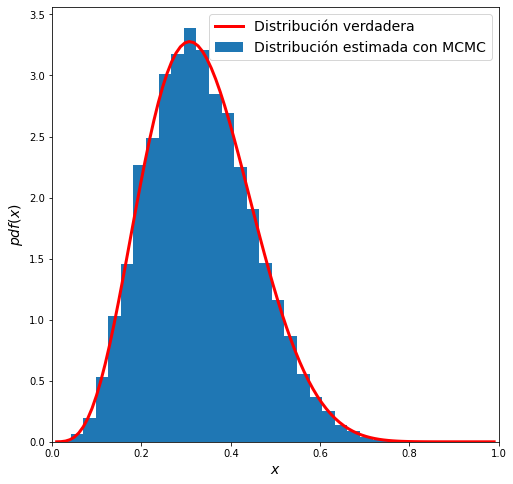

In [75]:
# distribución beta
samples = metropolis(func=beta, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Programación del error
¿Por que se debe utilizar la misma muestra de  θ  en el numerador y denominador para estimar  μposterior?

¿Por que a la hora de hacer la simulación de M.C hemos podido utilizar una función sin normalizar proporcional a  π(x|θ)  eq. (5) y no  π(x|θ) ?


## Ejercicio 2
### Estimar empíricamente la función de densidad de probabilidad a posteriori  π(θ|x)  del ejercicio anterior y validarla con el resultado teórico. Discutir los resultados